<a href="https://colab.research.google.com/github/ODARI-CHARLES1/ColabNotebooks/blob/main/FarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


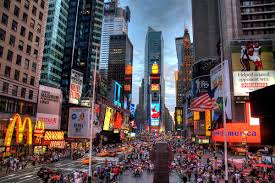
# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

Dataset: [New York City Taxi Fare Prediction Dataset](https://www.kaggle.com/datasets/dansbecker/new-york-city-taxi-fare-prediction)

## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas



Install Required libraries


In [129]:
!pip install joblib numpy pandas jovian opendatasets scikit-learn xgboost --quiet

In [123]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import joblib

In [24]:
from google.colab import files
file=files.upload()

In [51]:
df=pd.read_csv("/content/train.csv.zip")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


##Explore dataset


In [52]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [53]:
df.pickup_datetime.min(),df.pickup_datetime.max()

('2009-01-01 01:31:49 UTC', '2015-06-30 22:42:39 UTC')

In [62]:
x=df.drop("fare_amount",axis=1).drop('key',axis=1)
y=df.fare_amount

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
x_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-72.506292,39.933618,-72.496197,39.920941,1.669700
std,10.404650,6.280110,10.435716,6.028609,1.291044
min,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,-73.992060,40.734843,-73.991172,40.734309,1.000000
50%,-73.981848,40.752707,-73.980056,40.753459,1.000000
75%,-73.967092,40.767421,-73.963501,40.768250,2.000000
max,40.783472,401.083332,40.802437,43.415190,6.000000


In [72]:
x_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,-72.523608,39.934322,-72.538290,39.947494,1.66040
std,10.351096,5.999063,10.294664,5.959176,1.28181
min,-74.182943,-73.983285,-74.302143,-74.001000,0.00000
25%,-73.992069,40.734957,-73.991056,40.734632,1.00000
50%,-73.981788,40.752496,-73.980148,40.752921,1.00000
75%,-73.967319,40.767129,-73.963867,40.767666,2.00000
max,40.766125,41.366138,40.851027,41.366138,6.00000


In [69]:
x_train.pickup_datetime.min(),x_train.pickup_datetime.max()

('2009-01-01 01:31:49 UTC', '2015-06-30 22:42:39 UTC')

In [70]:
x_test.pickup_datetime.min(),x_test.pickup_datetime.max()

('2009-01-01 02:05:37 UTC', '2015-06-29 20:37:21 UTC')

##Data Analysis and Visualisation

In [77]:
#dropping any missin values
x_test.dropna().info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 33553 to 5857
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    10000 non-null  object 
 1   pickup_longitude   10000 non-null  float64
 2   pickup_latitude    10000 non-null  float64
 3   dropoff_longitude  10000 non-null  float64
 4   dropoff_latitude   10000 non-null  float64
 5   passenger_count    10000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 804.9+ KB


In [78]:
x_train.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 39087 to 15795
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    40000 non-null  object 
 1   pickup_longitude   40000 non-null  float64
 2   pickup_latitude    40000 non-null  float64
 3   dropoff_longitude  40000 non-null  float64
 4   dropoff_latitude   40000 non-null  float64
 5   passenger_count    40000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ MB


In [80]:
y_test.describe()

,fare_amount
count,10000.000000
mean,11.313628
std,9.642625
min,2.500000
25%,6.000000
50%,8.500000
75%,12.500000
max,165.000000


In [82]:
y_train.describe()

,fare_amount
count,40000.000000
mean,11.376807
std,9.696340
min,-5.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,200.000000


##Train Hardcoded & Baseline Models

In [91]:
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()
    pass

  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)



In [92]:
mean_model=MeanRegressor()
mean_model.fit(x_train,y_train)
mean_model.mean
mean_model.predict(x_train)

array([11.37680725, 11.37680725, 11.37680725, ..., 11.37680725,
       11.37680725, 11.37680725])

In [106]:
#evaluation of the train target with predicted values
np.sqrt(mean_squared_error(y_train,mean_model.predict(x_train)))



np.float64(9.696218688429393)

In [107]:
#evaluation of the test target with predicted values
np.sqrt(mean_squared_error(y_test,mean_model.predict(x_test)))

np.float64(9.642349623159625)

##Train & Evaluate Baseline Model

In [115]:
#x_train.drop("pickup_datetime",axis=1,inplace=True)

linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [119]:
preds=linear_model.predict(x_train)
preds

array([11.8194015 , 11.82023383, 11.68760633, ..., 11.41950891,
       11.28486768, 11.28699375])

In [120]:
#evaluation of the model
np.sqrt(mean_squared_error(y_train,preds))

np.float64(9.694376465236946)

#Saving the model in the memory

In [126]:
joblib.dump(linear_model,"linear_model.joblib")

['linear_model.joblib']

In [128]:
#loading the model
model=joblib.load("linear_model.joblib")

array([11.8194015 , 11.82023383, 11.68760633, ..., 11.41950891,
       11.28486768, 11.28699375])